# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Eric Meyer

#### Module 6 Repo: https://github.com/ericmeyer1/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [ ]:
# Testing for all correct libraries installed for the assignment
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
blis               1.0.1
bs4                0.0.2
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
cymem              2.0.8
debugpy            1.8.8
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.1
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
langcodes          3.4.1
language_data      1.2.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.9.1
numpy              2.0.2
packaging

#### Question 1:
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file).

In [10]:
# Importing requests, beautifulsoup, and pickle packages
import requests
from bs4 import BeautifulSoup
import pickle

# Designating the url as a variable
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
# Using a get request to gather data from webpage
response = requests.get(url)

# Using if/else to test request results and if good, getting html  with beautifulsoup and storing as a pickle file
if response.status_code == 200:
    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    articleHtml = str(soup)

    # Save the parsed HTML content to a .pkl file
    with open("article_html.pkl", "wb") as file:
        pickle.dump(articleHtml, file)
    print("HTML content successfully saved to article_html.pkl")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

HTML content successfully saved to article_html.pkl


#### Question 2:
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [12]:
# Loading the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    htmlContent = pickle.load(file)

# Parsing the loaded HTML with BeautifulSoup
soup = BeautifulSoup(htmlContent, "html.parser")

# Trying to get only the article we are after from this webpage
onlyArticle = soup.find('article')

# Extracting and printing the plain text content of the HTML
articleText = onlyArticle.get_text()
print(articleText)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

#### Question 3:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Importing spacy and counter for this portion of the project
import spacy
from collections import Counter

# Loading the spaCy model
nlp = spacy.load("en_core_web_sm")

# Processing the text with spaCy
doc = nlp(articleText)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
tokenCounts = Counter(tokens)

# Get the 5 most common tokens
mostCommonTokens = tokenCounts.most_common(5)

# Print the results
print("Top 5 Most Frequent Tokens:")
for token, freq in mostCommonTokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


#### Question 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Filtering lemmas: removing stopwords, punctuation, and whitespace (NOTE: using doc variable from previous step which is the nlp result of our article text)
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Counting lemma frequencies
lemmaCounts = Counter(lemmas)

# Getting the 5 most common lemmas
mostCommonLemmas = lemmaCounts.most_common(5)

# Printing the results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in mostCommonLemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


#### Question 5:
Define the following methods:
- `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
-  `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [29]:
# Splitting our doc variable of article text from above into sentences
sentences = list(doc.sents)

# Identifing the top 5 frequent tokens was done above and is in variable: NOTE: mostCommonTokens

# Identifing the top 5 frequent lemmas was done above and is in variable: NOTE: mostCommonLemmas

# Defining our method to score a sentence by token frequency
def scoreSentenceByToken(sentence, interestingTokens):
    tokensInSentence = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct and not token.is_space]
    countInteresting = sum(1 for token in tokensInSentence if token in interestingTokens)
    return countInteresting / len(tokensInSentence) if tokensInSentence else 0

# Defining our method to score a sentence by lemma frequency
def scoreSentenceByLemma(sentence, interestingLemmas):
    lemmasInSentence = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct and not token.is_space]
    countInteresting = sum(1 for lemma in lemmasInSentence if lemma in interestingLemmas)
    return countInteresting / len(lemmasInSentence) if lemmasInSentence else 0

# Frequent tokens and lemmas from questions 3 and 4
frequentTokens = [token for token, _ in mostCommonTokens]
frequentLemmas = [lemma for lemma, _ in mostCommonLemmas] 

# Test the functions with the first sentence
firstSentence = sentences[0]
tokenScore = scoreSentenceByToken(firstSentence, frequentTokens)
lemmaScore = scoreSentenceByLemma(firstSentence, frequentLemmas)

# Print results
print("First Sentence:")
print(firstSentence.text)
print()
print(f"Token score for first sentence: {tokenScore:.2f}")
print(f"Lemma score for first sentence: {lemmaScore:.2f}")

First Sentence:


How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Token score for first sentence: 0.20
Lemma score for first sentence: 0.15


#### Question 6:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

C:\Users\Lexi\AppData\Local\Temp\ipykernel_4296\739926829.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


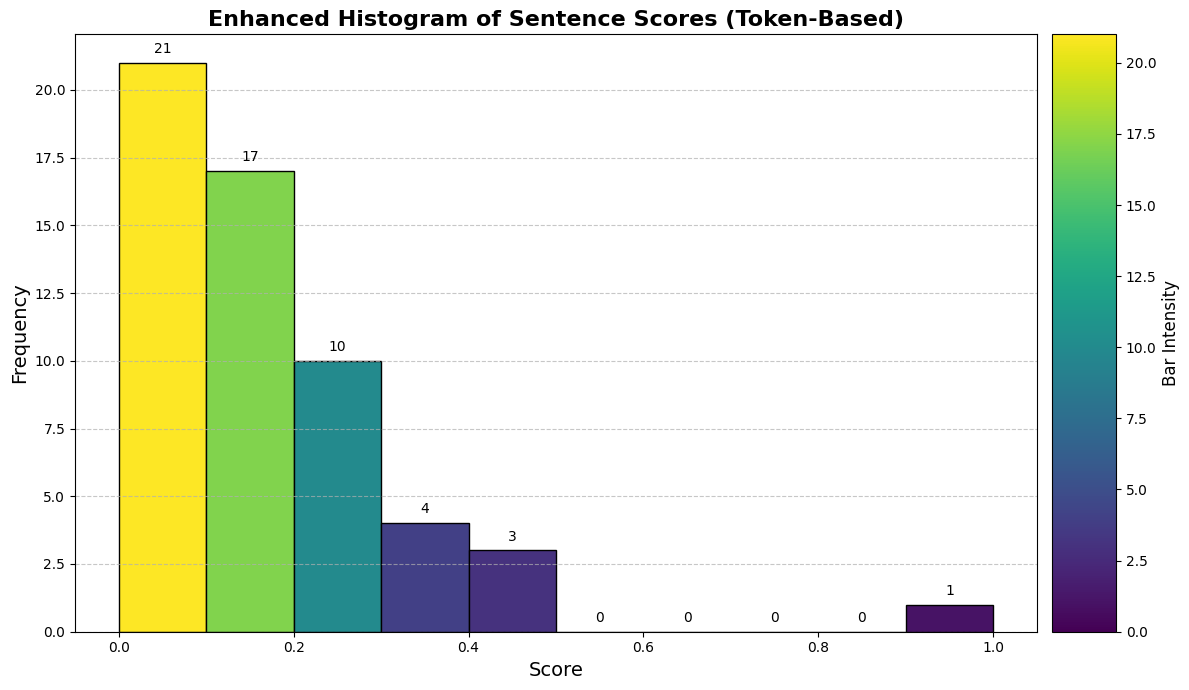

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as mcolorbar
import matplotlib.gridspec as gridspec
import numpy as np

# Calculate scores for all sentences based on tokens
tokenScores = [
    scoreSentenceByToken(sentence, frequentTokens)
    for sentence in sentences
]

# Create the figure and grid for the plot and colorbar
fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1])  # Wider plot, narrow colorbar
ax = fig.add_subplot(gs[0])  # Main plot
cax = fig.add_subplot(gs[1])  # Colorbar axis

# Plot the histogram
counts, bins, patches = ax.hist(
    tokenScores, bins=10, edgecolor="black", color="skyblue"
)

# Apply a color map (e.g., "viridis") to bars
cmap = cm.get_cmap("viridis")
norm = plt.Normalize(counts.min(), counts.max())

# Update bar colors based on frequency
for patch, count in zip(patches, counts):
    patch.set_facecolor(cmap(norm(count)))

# Create a ScalarMappable for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array to enable the color bar
cb = fig.colorbar(sm, cax=cax)
cb.set_label("Bar Intensity", fontsize=12)

# Add labels to each bar
for count, patch in zip(counts, patches):
    ax.annotate(
        f"{int(count)}",
        xy=(patch.get_x() + patch.get_width() / 2, count),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Add titles and labels
ax.set_title("Enhanced Histogram of Sentence Scores (Token-Based)", fontsize=16, weight="bold")
ax.set_xlabel("Score", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).